### Diferentes tipos de números em Julia ###

#### Números de "hardware" ####

Tipos que podem ser processados diretamente pelo hardware.

Por padrão, o Julia usa o Int e o Float com 64 bits, mas temos outros tamanhos disponíveis.

In [1]:
Int

Int64

In [2]:
Int8

Int8

In [3]:
Int16

Int16

In [4]:
Int32

Int32

In [5]:
Int64

Int64

In [6]:
Int128 

Int128

In [7]:
Float64

Float64

<center>
    <figure>
        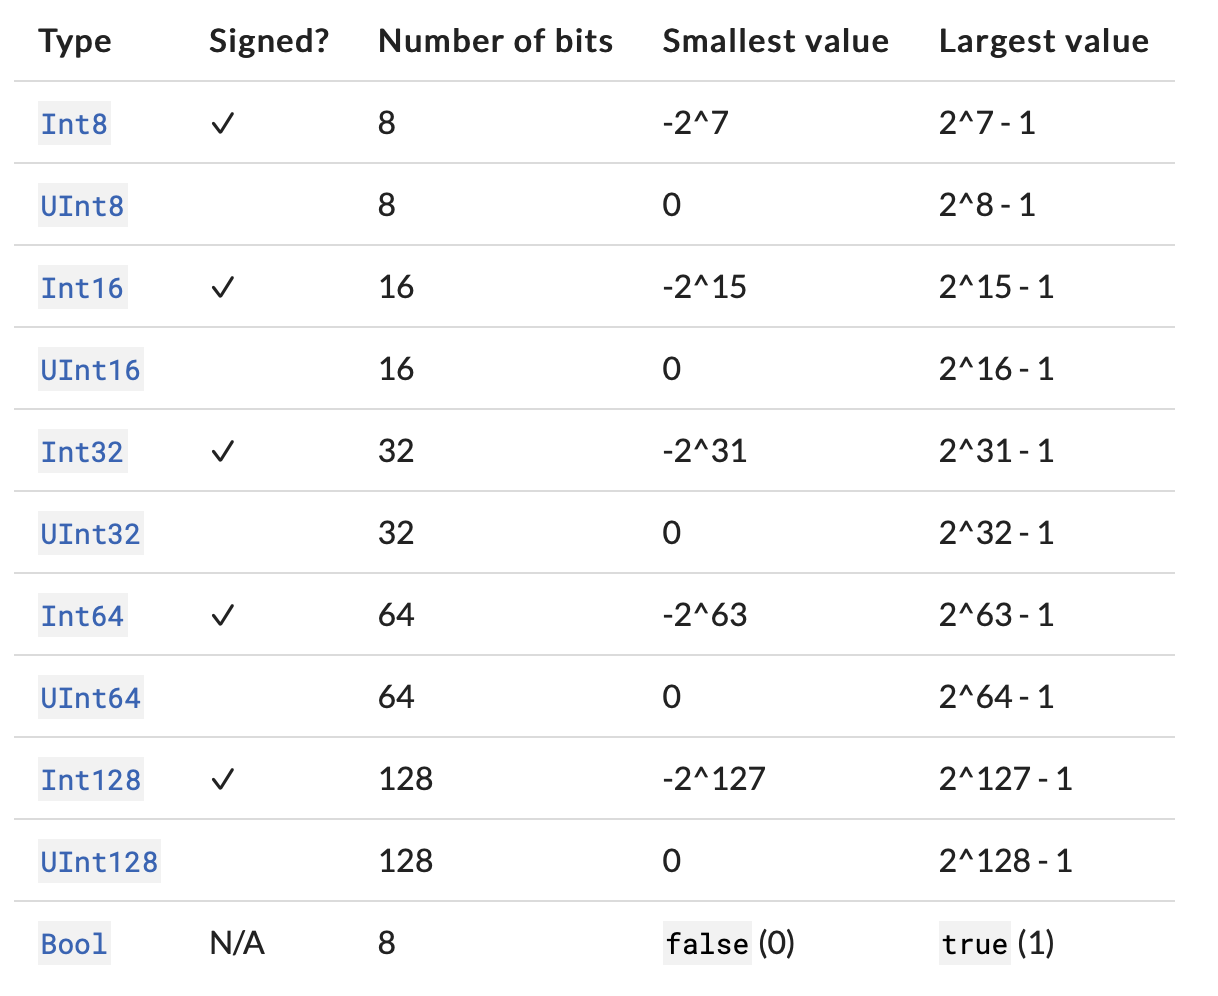
        <figcaption>Tabela dos inteiros</figcaption>
    </figure>
</center>

<center>
    <figure>
        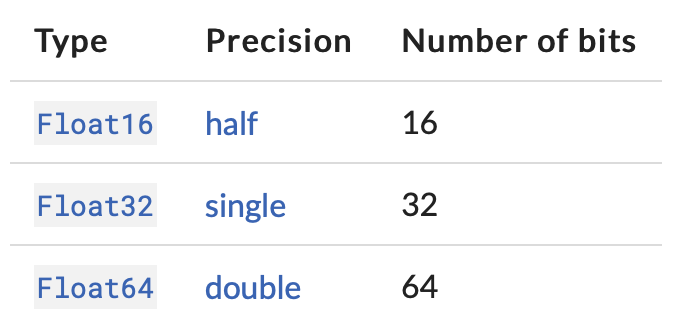
        <figcaption>Tabela de floats</figcaption>
    </figure>
</center>

#### Números de "software" ####

Tipos que são processados por software e permitem superar as limitações do hardware.

Podemos definir previamente a precisão desses tipos.

Em Python, por padrão os números são assim.

In [8]:
BigInt

BigInt

In [9]:
BigFloat

BigFloat

In [10]:
BigFloat

BigFloat

### Overflow ###

O Int8 varia de -128 a 127, por ter 8 bits para representar números em complemento a 2. \
É como se fosse um ciclo. Quando tentamos calcular 127 + 1, o resultado é o menor número possível.


In [11]:
Int8(127) + Int8(1)

-128

Overflow com o Int padrão de 64 bits:

In [12]:
x = 2^63 - 1   # valor máximo

9223372036854775807

In [13]:
x + 1   # valor mínimo

-9223372036854775808

In [14]:
-x - 2   # voltando para o valor máximo

9223372036854775807

In [15]:
- (x + 1)   # - (x + 1) = x + 1 🤯

-9223372036854775808

Doideras ainda maiores:

In [16]:
x * x

1

In [17]:
y = 2^62

4611686018427387904

In [18]:
y^2

0

In [19]:
x * y

-4611686018427387904

O BigInt pode nos ajudar:

In [20]:
BigInt(2^63)  # usando BigInt do jeito errado 👎

-9223372036854775808

In [21]:
BigInt(2)^63  # usando BigInt do jeito certo 👍c

9223372036854775808

### Números Especiais ###

Inf

In [22]:
10.0^308

1.0e308

In [23]:
10.0^309

Inf

In [24]:
1 / Inf

0.0

NaN (Not a Number)

In [25]:
Inf / Inf

NaN

In [26]:
10.0^308 / Inf

0.0

In [27]:
10.0^309 / Inf

NaN

In [28]:
0 / 0

NaN

\- 0 (zero negativo)

In [29]:
- 1 / Inf

-0.0

### Dividindo por 2 até chegar a zero ###

In [30]:
x = 1.0
while x > 0
    x = x / 2
    println("x = $x")
end

x = 0.5
x = 0.25
x = 0.125
x = 0.0625
x = 0.03125
x = 0.015625
x = 0.0078125
x = 0.00390625
x = 0.001953125
x = 0.0009765625
x = 0.00048828125
x = 0.000244140625
x = 0.0001220703125
x = 6.103515625e-5
x = 3.0517578125e-5
x = 1.52587890625e-5
x = 7.62939453125e-6
x = 3.814697265625e-6
x = 1.9073486328125e-6
x = 9.5367431640625e-7
x = 4.76837158203125e-7
x = 2.384185791015625e-7
x = 1.1920928955078125e-7
x = 5.960464477539063e-8
x = 2.9802322387695312e-8
x = 1.4901161193847656e-8
x = 7.450580596923828e-9
x = 3.725290298461914e-9
x = 1.862645149230957e-9
x = 9.313225746154785e-10
x = 4.656612873077393e-10
x = 2.3283064365386963e-10
x = 1.1641532182693481e-10
x = 5.820766091346741e-11
x = 2.9103830456733704e-11
x = 1.4551915228366852e-11
x = 7.275957614183426e-12
x = 3.637978807091713e-12
x = 1.8189894035458565e-12
x = 9.094947017729282e-13
x = 4.547473508864641e-13
x = 2.2737367544323206e-13
x = 1.1368683772161603e-13
x = 5.684341886080802e-14
x = 2.842170943040401e-14
x = 1.4210854715202

### Distância entre consecutivos ###

A distância entre números inteiros consecutivos é sempre 1. Mas a distância entre números de ponto flutuante varia.

In [31]:
using Plots
gr(size=(400,300))

Plots.GRBackend()

In [32]:
x = Float16(0.0)
X = Float16[0.0]
D = Float16[0.0]
while x < Inf
    y = nextfloat(x)
    dist = y - x
    x = y
    push!(X, x)
    push!(D, dist)
end

In [33]:
scatter(X, D, ms=1, m=(stroke(0)), leg=false)

### Erros básicos ###

In [35]:
0.1 + 0.2

0.30000000000000004

In [36]:
0.3

0.3

In [34]:
0.1 + 0.2 - 0.3

5.551115123125783e-17

### Epsilon ###
O menor valor que ainda faz alguma diferença quando é somado a outro número em ponto flutuante.

In [38]:
ϵ = 1.0   # julia permite esse tipo simbolo especial como variavel
while 1 + ϵ > 1
    ϵ = ϵ / 2
end
ϵ = 2ϵ

2.220446049250313e-16

Julia tem uma função para descobrir o epsilon de cada tipo de número.

In [39]:
eps(Float16)

Float16(0.000977)

In [40]:
eps(Float32)

1.1920929f-7

In [41]:
eps(Float64)

2.220446049250313e-16

In [42]:
eps(BigFloat)

1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77

#### Tchau, propriedade associativa! ####

In [50]:
ϵ

2.220446049250313e-16

In [51]:
1 + 1e-16

1.0

In [52]:
(1 + 1e-16) + 1e-16

1.0

In [53]:
1 + (1e-16 + 1e-16)

1.0000000000000002

### Calculando o limite ###

$$ \frac{1}{2\sqrt{a}} = \frac{d}{dx}\Big(\sqrt{x}\Big)|_{x = a} = \lim_{h \to 0} \frac{\sqrt{a + h} - \sqrt{a}}{h} \approx \frac{\sqrt{a + h} - \sqrt{a}}{h} = \frac{1}{\sqrt{a+h} + \sqrt{a}} $$

In [81]:
h = 2.0^(-1)
a = 1.0
1 / 2 / sqrt(a)

0.5

In [82]:
(sqrt(a + h) - sqrt(a)) / h

0.4494897427831779

In [74]:
using Plots
gr(size=(400,300))
plot(rand(3), rand(3))
nothing

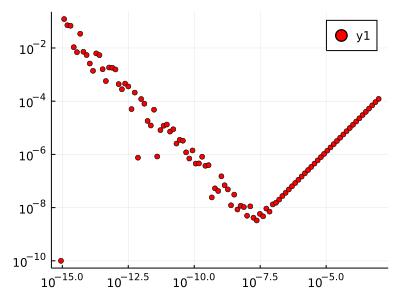

In [78]:
Erro(h) = max(abs((sqrt(1 + h) - 1) / h - 0.5), 1e-10)
valores_h = [2.0^p for p = range(-50, -10, length=100)]

plot(xaxis=:log, yaxis=:log)
scatter!(valores_h, Erro.(valores_h), c=:red, ms=3)

Como h está no denominador, chega um momento em que quanto menor ele fica, mais o valor do limite explode, o que acaba aumentando o erro.

Exemplos:

In [85]:
h = 10^(-1);
(sqrt(a + h) - sqrt(a)) / h

0.4880884817015163

In [86]:
h = 10^(-4);
(sqrt(a + h) - sqrt(a)) / h

0.49998750062396613

In [87]:
h = 10^(-8);
(sqrt(a + h) - sqrt(a)) / h

0.49999999696126424

In [91]:
h = 10^(-9);
(sqrt(a + h) - sqrt(a)) / h

0.5000000413701853

In [96]:
h = 10^(-12);
(sqrt(a + h) - sqrt(a)) / h

0.5000444502911702

In [97]:
h = 10^(-13);
(sqrt(a + h) - sqrt(a)) / h

0.4996003610813201

In [98]:
h = 10^(-14);
(sqrt(a + h) - sqrt(a)) / h

0.4884981308350685

In [99]:
h = 10^(-15);
(sqrt(a + h) - sqrt(a)) / h

0.4440892098500622

In [101]:
h = 10^(-16);   # por que vai para zero?
(sqrt(a + h) - sqrt(a)) / h

0.0

#### Outra forma de calcular o limite ####

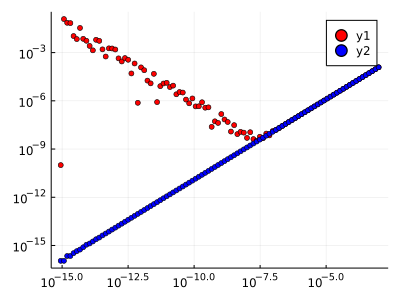

In [103]:
Erro1(h) = max(abs((sqrt(1 + h) - 1) / h - 0.5), 1e-10)
Erro2(h) = max(abs(1 / (sqrt(1 + h) + 1) - 0.5), 1e-16)
valores_h = [2.0^p for p = range(-50, -10, length=100)]

plot(xaxis=:log, yaxis=:log)
scatter!(valores_h, Erro1.(valores_h), c=:red, ms=3)
scatter!(valores_h, Erro2.(valores_h), c=:blue, ms=3)

Dessa maneira o limite não explode.

### Big Float ###

O BigFloat tem uma precisão arbitrária, mas definida a priori.

In [104]:
setprecision(2^14)
BigFloat(1) / 10 + BigFloat(2) / 10

0.30000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [105]:
pi

π = 3.1415926535897...

In [106]:
Float64(pi)

3.141592653589793

In [107]:
BigFloat(pi)

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019

In [108]:
setprecision(2^15)
sqrt(big"2")^2 - 2

-1.4129671931155272885554804375717436907474887820545013118188285159380758593320325415822070487073549615388167953265727527655515151708581203157357453539197339230289316153993804415588002386702816373651768009926356325909413661994283923573124939011100936585695252104670102074324065723752579793187037740715378506499325042883449364126358479190852386885457629033179544337195959517112604788915533413484022890030864478088974863907402327078355490742525822607767744459731512088879868567712927719260427374096235800947615456972191898019790584265475419779119597263166360697401509536004091843270358540015064545073897574580017734981758602660238923829228362160297903360423094215845999779295901682967039297502883109944977966613908069626968919155829501912396447204075559995839278832256462168921725383430108451942863901276673551834409382158511244616706873668252992298042932453821442042056044877304888385660376093587408016103281901715943654007937868670258956187194666963200988753376746935349988903290282055939637548939681

### Dúvida ###
Por que fica diferente quando faço o plot dessa forma?

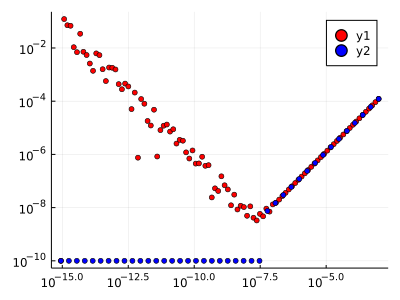

In [109]:
Erro1(h) = max(abs((sqrt(1 + h) - 1) / h - 0.5), 1e-10)

valores_h1 = [2.0^p for p = range(-50, -10, length=100)]
valores_h2 = 2.0 .^ (-50:-10)

plot(xaxis=:log, yaxis=:log)
scatter!(valores_h1, Erro1.(valores_h1), c=:red, ms=3)
scatter!(valores_h2, Erro1.(valores_h2), c=:blue, ms=3)